In [3]:
import pystan as ps
import seaborn as sns
import numpy as np

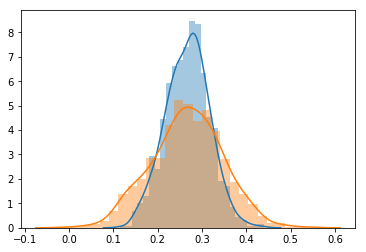

In [17]:
npts = 1000
sigma = 0.05
mean = 0.27
He_true = np.random.randn(npts) * sigma + mean
He_err = 0.06
obs = He_true + np.random.randn(npts) * He_err
sns.distplot(He_true)
sns.distplot(obs)

In [21]:
model = '''
data {
    int N;
    real He[N];
    real tau;
}
parameters {
    real mu;
    real<lower=0> sigma;
    real He_true_std[N];
}
transformed parameters {
    real He_true[N];
    for (i in 1:N){
        He_true[i] = mu + sigma * He_true_std[i];
    }
}
model {
    He_true_std ~ normal(0, 1);
    He ~ normal(He_true, tau);
    mu ~ normal(0.27, 0.1);
    sigma ~ uniform(0, 1);
}
'''
sm = ps.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ad7aaefa22e3a4b0b77447797db8472f NOW.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/2_/b8v0t8pn1hj1p3r4lyfvvv2h0000gn/T/tmpnjr60nyz/stanfit4anon_model_ad7aaefa22e3a4b0b77447797db8472f_5491463316556437409.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [22]:
dat = {'N': npts,
      'He': obs,
      'tau': He_err}
fit = sm.sampling(data=dat, iter=2000, chains=4)

In [23]:
print(fit)

Inference for Stan model: anon_model_ad7aaefa22e3a4b0b77447797db8472f.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu                  0.27  4.6e-5 2.5e-3   0.26   0.26   0.27   0.27   0.27   2990    1.0
sigma               0.05  7.0e-5 2.7e-3   0.05   0.05   0.05   0.06   0.06   1448    1.0
He_true_std[1]      0.08 10.0e-3   0.74  -1.36  -0.42   0.08   0.58   1.51   5469    1.0
He_true_std[2]     -0.51    0.01   0.76   -2.0  -1.02  -0.51-4.9e-3   0.94   5483    1.0
He_true_std[3]      0.95  9.9e-3   0.73   -0.5   0.45   0.95   1.44   2.41   5457    1.0
He_true_std[4]      0.04    0.01   0.76  -1.46  -0.46   0.04   0.55   1.49   5613    1.0
He_true_std[5]     -1.32  9.5e-3   0.76  -2.81  -1.81  -1.33  -0.83   0.21   6464    1.0
He_true_std[6]     -0.94    0.01   0.76  -2.44  -1.43  -0.94  -0.44   0.59   5488    1.0
He_true_st

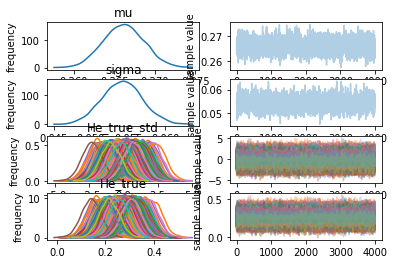

In [24]:
import matplotlib.pyplot as plt
fit.plot()
plt.show()